# 機械学習プログラミング
* 学籍番号：2364902
* 氏名：金　奎碩

## 演習1: k平均法による教師なし学習を実行するプログラムの作成
サンプル1で紹介したMNISTデータセットに対して、クラスター数を10とするk平均法を適用するプログラムを作成してください。
学習結果として、得られたクラスター中心を画像で表示してください。
さらに、学習済みモデルをテストデータに適用し、どのクラスターと判別されたか確認してください。（クラスター番号は画像の数値とは一致しないので、クラスター中心と比較すると良いです。）

ただし、学習にかかる時間を削減するため、学習データ数は10000とします。

### **補足：クラスター中心を表示する際の注意点**
クラスター中心を取得するには、主に次の2つの方法があります。どちらで実装しても問題ありません。
* 学習データのうち各クラスターに属すると判定されたデータの平均をとる
* クラスター中心を表す属性を使用する

784(28*28)要素の1次元配列を画像として表示するには、`reshape(28, 28)`で2次元に直して表示します。
画像はmatplotlibライブラリで表示可能です（サンプル1参照）。

### **参考**
KMeansオブジェクトのリファレンス：https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



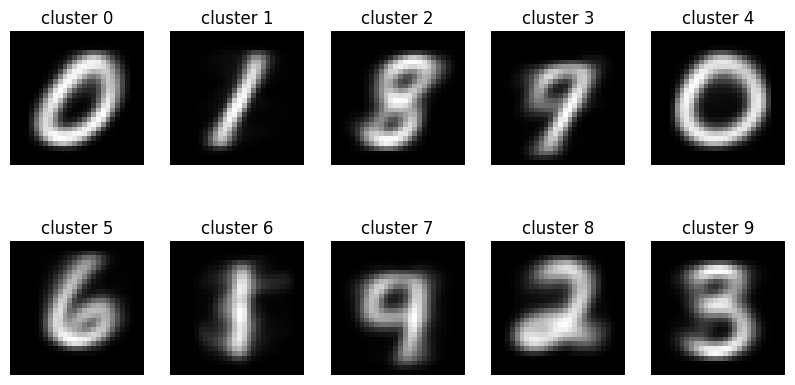

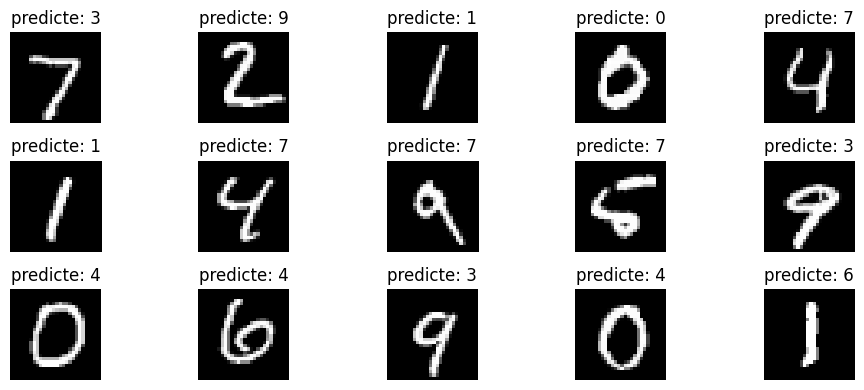

In [6]:
from keras.datasets import mnist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## データの準備
(X_train_original, y_train), (X_test_original, y_test) = mnist.load_data()
# 画像を1次元に変換し、784変数の入力として扱う
X_train = X_train_original.reshape(-1, 28*28)
X_test = X_test_original.reshape(-1, 28*28)
# 学習に時間がかかるためデータ数を削減する
X_train = X_train[:10000, :]

## k平均法の適用
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)


## 学習結果の表示
cluster_centers = kmeans.cluster_centers_

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
cluster_centers_list = list(cluster_centers)

for i in range(len(cluster_centers_list)):
    ax = axes.flat[i]
    ax.imshow(cluster_centers_list[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'cluster {i}')
    ax.axis('off')

plt.show()
## テストデータに対して適用
predicted_value = kmeans.predict(X_test)
fig, axes = plt.subplots(3, 5, figsize=(10, 4))
X_test_original_list = list(X_test_original)
predicted_value_list = list(predicted_value)

for i in range(len(X_test_original_list[:15])):
    ax = axes.ravel()[i]
    ax.imshow(X_test_original_list[i], cmap='gray')
    ax.set_title(f'predicte: {predicted_value_list[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 演習2: ロジスティック回帰モデルによる教師あり学習を実行するプログラムの作成
サンプル1で紹介したMNISTデータセットを利用してロジスティック回帰モデルを学習し、そのROC曲線およびAUCを計算して出力してください。ここで、0～4が描かれた画像をクラス0、5～9が描かれた画像をクラス1に分類するものとします。

※学習にかかる時間を削減するため、学習データ数は10000とします。

※学習が収束していない警告（ConvergenceWarning）が出ていても問題ないものとします。

### **参考**
LogisticRegressionオブジェクトのリファレンス：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


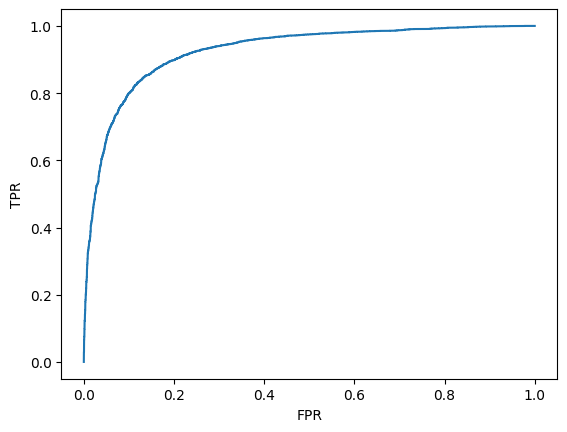

AUC: 0.9252628801643061


In [7]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## MNISTデータの読み込み
(X_train_original, y_train), (X_test_original, y_test) = mnist.load_data()
# 画像を1次元に変換し、784変数の入力として扱う
X_train = X_train_original.reshape(-1, 28*28)
X_test = X_test_original.reshape(-1, 28*28)
# 正解データを編集し、0～4をクラス0、5～9をクラス1とする2クラス分類問題に変換する
threshold = 5
y_train[y_train < threshold] = 0
y_train[y_train >= threshold] = 1
y_test[y_test < threshold] = 0
y_test[y_test >= threshold] = 1
# 時間がかかるためデータ数を削減する
X_train = X_train[:10000, :]
y_train = y_train[:10000]

## ロジスティック回帰モデルの学習
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

## ROC曲線の描画
pred_positive_label = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_positive_label)

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.show()

## AUCを計算して出力する
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

## 演習3: Fashion-MNISTに対してk平均法を実行するプログラムの作成
サンプル2で紹介したFashion-MNISTデータセットに対して、クラスター数を10とするk平均法を適用するプログラムを作成してください。

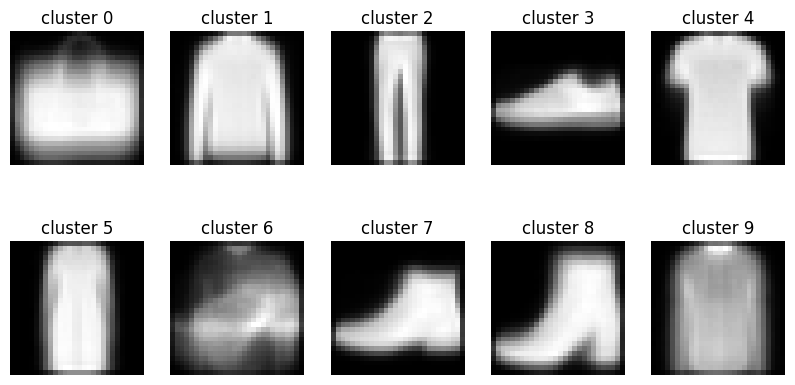

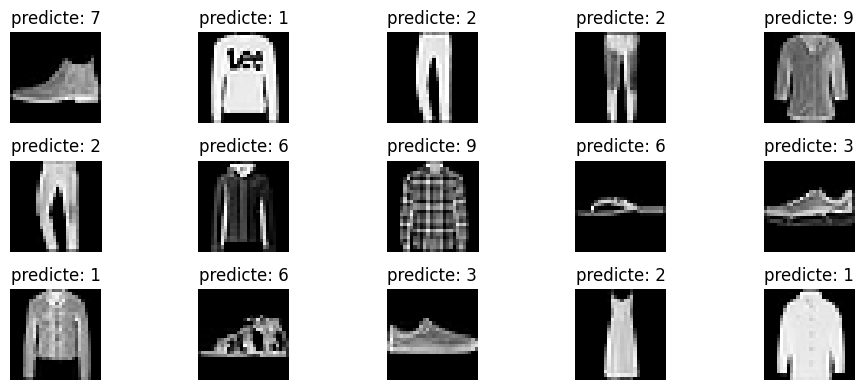

In [5]:
from keras.datasets import fashion_mnist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## データの準備
(X_train_original, y_train), (X_test_original, y_test) = fashion_mnist.load_data()
# 画像を1次元に変換し、784変数の入力として扱う
X_train = X_train_original.reshape(-1, 28*28)
X_test = X_test_original.reshape(-1, 28*28)
# 学習に時間がかかるためデータ数を削減する
X_train = X_train[:10000, :]

## k平均法の適用
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)


## 学習結果の表示
cluster_centers = kmeans.cluster_centers_

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
cluster_centers_list = list(cluster_centers)

for i in range(len(cluster_centers_list)):
    ax = axes.flat[i]
    ax.imshow(cluster_centers_list[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'cluster {i}')
    ax.axis('off')

plt.show()
## テストデータに対して適用
predicted_value = kmeans.predict(X_test)
fig, axes = plt.subplots(3, 5, figsize=(10, 4))
X_test_original_list = list(X_test_original)
predicted_value_list = list(predicted_value)

for i in range(len(X_test_original_list[:15])):
    ax = axes.ravel()[i]
    ax.imshow(X_test_original_list[i], cmap='gray')
    ax.set_title(f'predicte: {predicted_value_list[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()



## 演習4: Fashion-MNISTに対してロジスティック回帰を実行するプログラムの作成
サンプル2で紹介したFashion-MNISTデータセットを利用してロジスティック回帰モデルを学習し、そのROC曲線およびAUCを計算して出力してください。

ここでは、クラス0（Tシャツ/トップス）とクラス6（シャツ）の2クラス識別を実施するものとします。
この2クラスは変更しても構いませんが、変更する場合は`cluster0 < cluster1`となるようにクラスを指定してください。

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


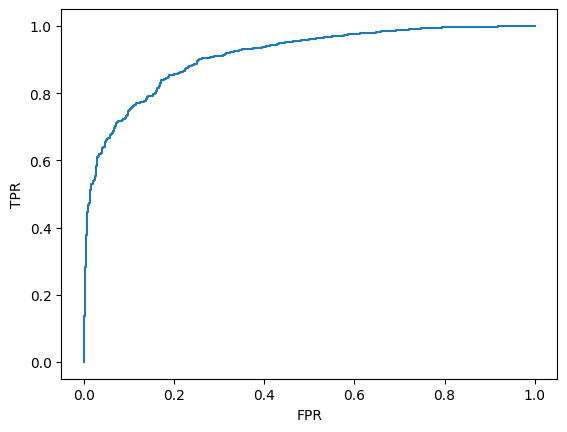

AUC: 0.911949


In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

## Fashion-MNISTデータの読み込み
(X_train_original, y_train), (X_test_original, y_test) = fashion_mnist.load_data()
X_train = X_train_original.reshape(-1, 28*28)
X_test = X_test_original.reshape(-1, 28*28)
# 2クラス分類問題に変換（対象を変更する場合は、cluster0 < cluster1とすること）
cluster0 = 0  # 0: Tシャツ/トップス
cluster1 = 6  # 6: シャツ
X_train = X_train[(y_train == cluster0) | (y_train == cluster1)]
y_train = y_train[(y_train == cluster0) | (y_train == cluster1)]
y_train = (y_train - cluster0) / (cluster1 - cluster0)

X_test = X_test[(y_test == cluster0) | (y_test == cluster1)]
y_test = y_test[(y_test == cluster0) | (y_test == cluster1)]
y_test = (y_test - cluster0) / (cluster1 - cluster0)

# 時間がかかるためデータ数を削減
X_train = X_train[:10000, :]
y_train = y_train[:10000]

## ロジスティック回帰モデルの学習
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

## ROC曲線の描画
pred_positive_label = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_positive_label)

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.show()

## AUCを計算して出力する
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')